# Рекомендация тарифов

В распоряжении данные о поведении клиентов, которые уже перешли тарифы. Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится.

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import time
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/datasets/users_behavior.csv')
df

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
...,...,...,...,...,...
3209,122.0,910.98,20.0,35124.90,1
3210,25.0,190.36,0.0,3275.61,0
3211,97.0,634.44,70.0,13974.06,0
3212,64.0,462.32,90.0,31239.78,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
calls       3214 non-null float64
minutes     3214 non-null float64
messages    3214 non-null float64
mb_used     3214 non-null float64
is_ultra    3214 non-null int64
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [4]:
df.describe()

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


In [5]:
df_train, df_valid = train_test_split(df, test_size=0.4, random_state=12345)
df_valid, df_test = train_test_split(df_valid, test_size=0.5, random_state=12345)

features_train = df_train.drop(['is_ultra'], axis=1)
target_train = df_train['is_ultra']

features_valid = df_valid.drop(['is_ultra'], axis=1)
target_valid = df_valid['is_ultra']

features_test = df_test.drop(['is_ultra'], axis=1)
target_test = df_test['is_ultra']

Отдал под валидационную выборку 40% данных, чтобы потом разделить ее еще и на тестовую по 20%. Итого: Обучающая = 60%, Валидационная = 20%, Тестовая = 20%

In [6]:
features_train.shape, features_valid.shape, features_test.shape

((1928, 4), (643, 4), (643, 4))

# Случайный лес

In [7]:
best_mоdel_forest = None
best_result_forest = 0
best_est_forest = 0
best_depth_forest = 0

for est in range(10, 71, 5):
    for depth in range(1, 21):
        
        model_forest = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model_forest.fit(features_train, target_train) 
        predict_valid_forest = model_forest.predict(features_valid) 
        result_forest = accuracy_score(target_valid, predict_valid_forest)
    
        if result_forest > best_result_forest:
            best_model_forest = model_forest
            best_result_forest = result_forest
            best_est_forest = est
            best_depth_forest = depth
        
print("Accuracy наилучшей модели на валидационной выборке:", best_result_forest, ', Лучший est:', best_est_forest, ', Глубина:', best_depth_forest)

Accuracy наилучшей модели на валидационной выборке: 0.8087091757387247 , Лучший est: 40 , Глубина: 8


# Логистическая регрессия

In [8]:
model_log = LogisticRegression(random_state=12345)
model_log.fit(features_train, target_train)
predict_log = model_log.predict(features_valid)
result_log = accuracy_score(target_valid, predict_log)

print("Accuracy модели логистической регрессии на валидационной выборке:", result_log)

Accuracy модели логистической регрессии на валидационной выборке: 0.7589424572317263


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



# Решающее дерево

In [9]:
best_model_tree = None
best_result_tree = 0
best_depth_tree = 0

for depth_tree in range(1, 11):
    model_tree = DecisionTreeClassifier(random_state=12345, max_depth=depth_tree)
    model_tree.fit(features_train, target_train)
    predict_tree = model_tree.predict(features_valid)
    result_tree = accuracy_score(target_valid, predict_tree)
    
    if result_tree > best_result_tree:
        best_model_tree = model_tree
        best_result_tree = result_tree
        best_depth_tree = depth_tree
        
print('Accuracy лучшей модели:', best_result_tree, ', Глубина:', best_depth_tree)

Accuracy лучшей модели: 0.7853810264385692 , Глубина: 3


# Решающее дерево тестовая выборка

In [10]:
start = time.time() #измерю скорость работы

model_tree_test = DecisionTreeClassifier(random_state=12345, max_depth=3)
model_tree_test.fit(features_train, target_train)
predict_tree_test = model_tree_test.predict(features_test)
result_tree_test = accuracy_score(target_test, predict_tree_test)

print('Accuracy решающего дерева на тестовой выборке:', result_tree_test)
print()

#измерю скорость работы

end = time.time()
print('Скорость:', end - start, 's')

Accuracy решающего дерева на тестовой выборке: 0.7791601866251944

Скорость: 0.007317066192626953 s


# Логистическая регрессия тестовая выборка

In [11]:
start = time.time() #измерю скорость работы

model_log_test = LogisticRegression(random_state=12345)
model_log_test.fit(features_train, target_train)
predict_log_test = model_log.predict(features_test)
result_log_test = accuracy_score(target_test, predict_log_test)

print("Accuracy модели логистической регрессии на тестовой выборке:", result_log_test)
print()

#измерю скорость работы

end = time.time()
print('Скорость:', end - start, 's')

Accuracy модели логистической регрессии на тестовой выборке: 0.7402799377916018

Скорость: 0.022235870361328125 s


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



# Случайный лес тестовая выборка

In [12]:
start = time.time() #измерю скорость работы

model_forest_test = RandomForestClassifier(random_state=12345, n_estimators=40, max_depth=8)
model_forest_test.fit(features_train, target_train) 
predict_test_forest = model_forest_test.predict(features_test) 
result_forest_test = accuracy_score(target_test, predict_test_forest)

print("Accuracy случайного леса на тестовой выборке:", result_forest_test)
print()

#измерю скорость работы

end = time.time()
print('Скорость:', end - start, 's')

Accuracy случайного леса на тестовой выборке: 0.7962674961119751

Скорость: 0.16064882278442383 s


# Сравнение моделей

In [13]:
df_models = pd.DataFrame([['log', result_log, result_log_test, 0.0192],
                          ['forest', best_result_forest, result_forest_test, 0.1614],
                          ['tree', best_result_tree, result_tree_test, 0.0067]], 
columns=['model','valid', 'test', 'speed'])

df_models

,model,valid,test,speed
0,log,0.758942,0.740280,0.0192
1,forest,0.808709,0.796267,0.1614
2,tree,0.785381,0.779160,0.0067


In [14]:
#отсоединю колонку "скорость", чтобы график показывал только качество

df_accuracy = df_models.drop(['speed'], axis=1)
df_speed = df_models[['model', 'speed']]

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

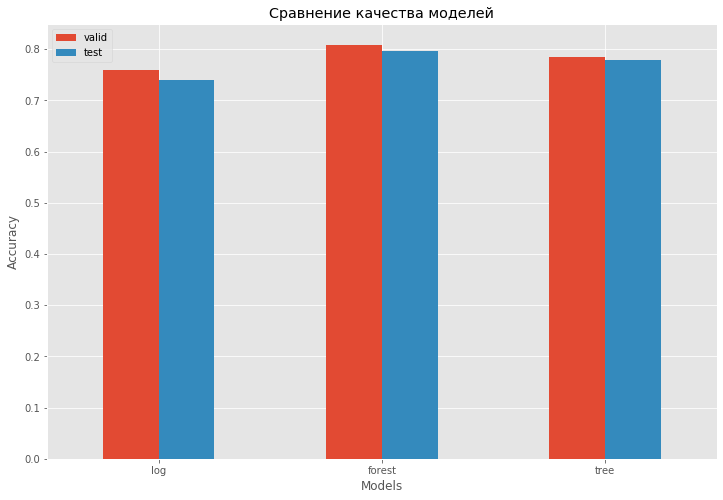

In [15]:
df_accuracy.set_index('model',inplace=True)

plt.style.use('ggplot')
ax = df_accuracy.plot.bar(figsize=(12,8))

ax.grid(True)
ax.legend(['valid', 'test'])
ax.set(ylabel='Accuracy', xlabel='Models', title='Сравнение качества моделей')
plt.xticks(rotation=360)

Модель "Случайный лес" получает более точный результат, но работает медленне всех. "Решающее дерево" показывает средний результат по качеству предсказаний, но работает быстрее всех.

# Посмотрю, как ошибался алгоритм "Случайный лес"

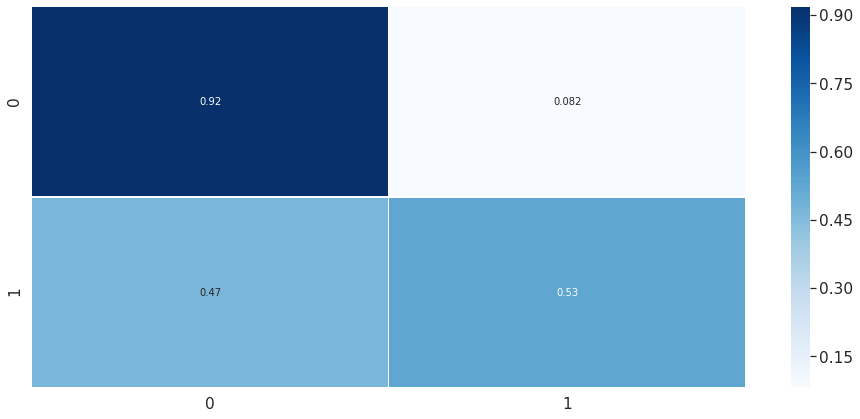

In [17]:
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns

matrix = confusion_matrix(target_test, predict_test_forest)
matrix = matrix.astype('float') / matrix.sum(axis = 1)[:, np.newaxis]

plt.figure(figsize=(16, 7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10}, cmap=plt.cm.Blues, linewidths=0.2)

В 92% случаев алгоритм определил верно тариф "Смарт"(0), ошибся с тарифом "Смарт" в 8% случаев. С тарифом "Ультра"(1) он справился хуже и работал чуть лучше случайного подбора.

## Проверка моделей на адекватность

In [22]:
model_dum = DummyClassifier(strategy='constant', constant= 0)
# лучше задать model_dum = DummyClassifier(strategy='most_frequent', constant= 0)
# тогда не придется задавать по какой константе оценивать: нулю или единице
# также можно работать только с одной парой выборок, например, с тестовыми (как в примере в документации)

model_dum.fit(features_train, target_train) 
predict_dum = model_dum.predict(features_train) 
result_dum = model_dum.score(features_test, target_test)

print("Качество dummy:", result_dum)

Качество dummy: 0.6842923794712286
